# Heart Attack Risk?
Attempt at classification of high/low risk individuals for heart condition.

## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression


## Import Data

In [3]:
df = pd.read_csv('Heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Age : Age of the patient<br>
Sex : Sex of the patient<br>
cp : Chest Pain type chest pain type
1) Value 1: typical angina<br>
2) Value 2: atypical angina<br>
3) Value 3: non-anginal pain<br>
4) Value 4: asymptomatic<br><br>
trtbps : resting blood pressure (in mm Hg)<br>
chol : cholestoral in mg/dl fetched via BMI sensor<br>
fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)<br>
restecg : resting electrocardiographic results
1) Value 0: normal<br>
2) Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)<br>
3) Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria<br><br>
thalach : maximum heart rate achieved<br>
exng: exercise induced angina (1 = yes; 0 = no)<br>
target : 0= less chance of heart attack 1= more chance of heart attack<br>




In [6]:
X = df.iloc[:,:10]
y = df.iloc[:,-1]

In [4]:
categoricals = ['sex','cp','fbs','restecg','exng']

In [24]:
numericals = []
for f in X.columns:
    if f not in categoricals:
        numericals.append(f)

maps = []
for c in categoricals:
    colormap={}
    color = 0
    for i in X[c].unique():
        colormap[i] = color
        color+=1
    maps.append(colormap)

## Train Test Split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

## Analysis

In [35]:
numericals, categoricals

(['age', 'trtbps', 'chol', 'thalachh', 'oldpeak'],
 ['sex', 'cp', 'fbs', 'restecg', 'exng'])

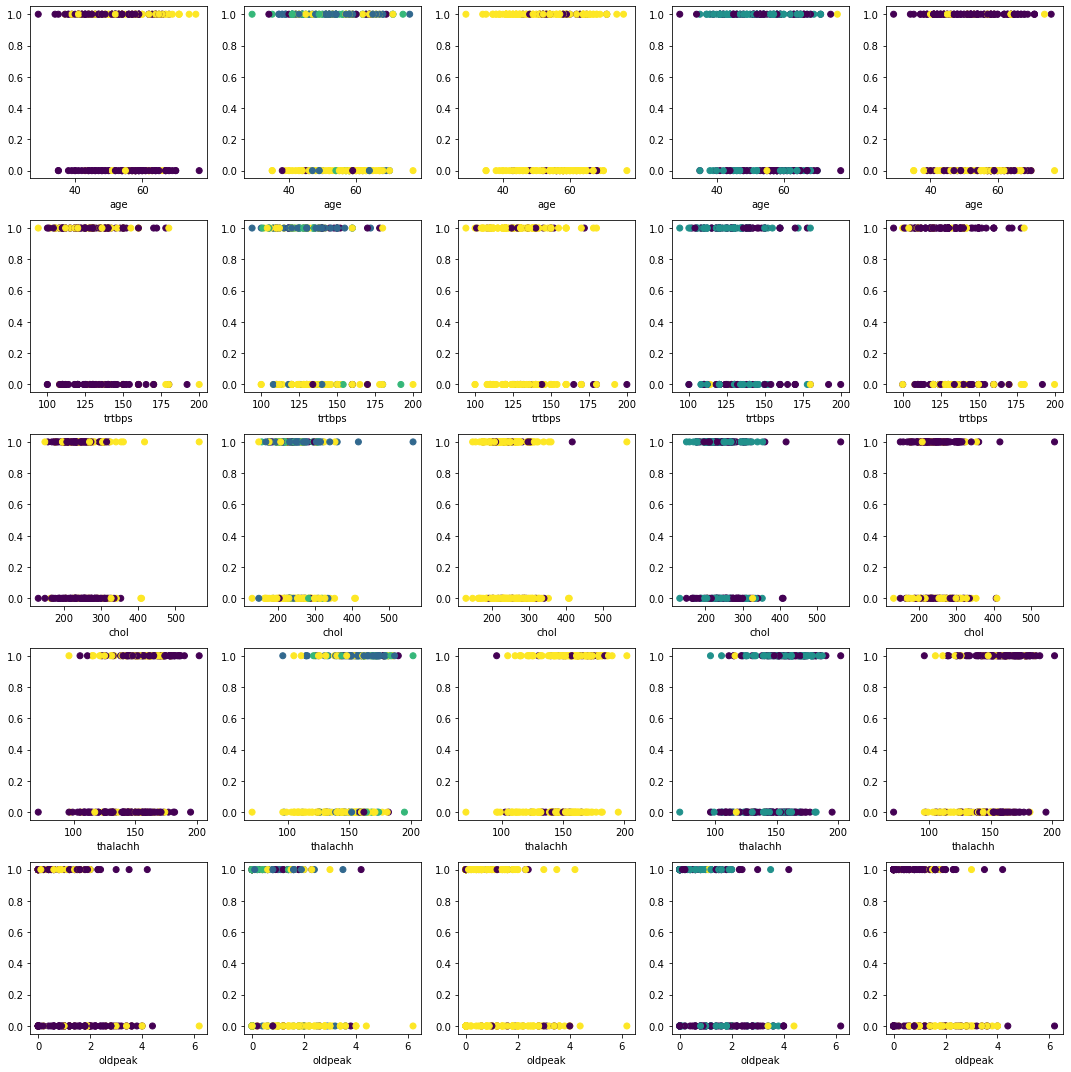

In [36]:
fig,ax = plt.subplots(len(categoricals),len(numericals), figsize=(15,15))

for i in range(len(numericals)):
    for j in range(len(categoricals)):
        ax[i][j].scatter(X_train[numericals[i]],y_train,c=X_train[categoricals[j]].map(maps[j]))
        ax[i][j].set_xlabel(numericals[i])
plt.tight_layout()

## Data Preprocessing

In [37]:
ct = ColumnTransformer(
    transformers=[('cat_encoder',OneHotEncoder(),categoricals),('num_encoder',StandardScaler(),numericals)],
    remainder='passthrough',
    sparse_threshold=0)
X_train=np.array(ct.fit_transform(X_train))

In [38]:
X_train

array([[ 0.        ,  1.        ,  0.        , ..., -0.64438605,
         0.79493027,  0.82249521],
       [ 0.        ,  1.        ,  1.        , ..., -0.00686536,
         0.9283066 ,  0.38922607],
       [ 0.        ,  1.        ,  1.        , ...,  0.14768511,
         0.48371884, -0.91058133],
       ...,
       [ 0.        ,  1.        ,  1.        , ..., -0.95348698,
        -0.89450323,  0.4758799 ],
       [ 1.        ,  0.        ,  1.        , ...,  1.53863933,
        -1.47246733,  2.03564879],
       [ 0.        ,  1.        ,  0.        , ...,  1.30681362,
         0.52817761,  0.73584138]])

## Training model

### Logistic Regression

In [39]:
logistic_clf = LogisticRegression()
logistic_clf.fit(X_train,y_train)

LogisticRegression()

In [40]:
y_train_pred_lr = logistic_clf.predict(X_train)
print('Train Accuracy',accuracy_score(y_train_pred_lr,y_train))

Train Accuracy 0.8264462809917356


In [41]:
y_test_pred_lr = logistic_clf.predict(ct.transform(X_test))
print('Test Accuracy',accuracy_score(y_test_pred_lr,y_test))

Test Accuracy 0.819672131147541
